<a href="https://colab.research.google.com/github/GVSU-CIS635/projects-outliers/blob/prophet-model/prophet_model_(prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Prophet

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
url = "streamflow_filled_ARIMA.csv"
df = pd.read_csv(url)

In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date").sort_index()
df = df[["Q (m3/s)"]].rename(columns={"Q (m3/s)": "Q_m3_s"})
print(df.head(), df.shape)

            Q_m3_s
Date              
1967-01-01  2690.0
1967-01-02  2650.0
1967-01-03  2650.0
1967-01-04  2610.0
1967-01-05  2570.0 (18628, 1)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18628 entries, 1967-01-01 to 2017-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q_m3_s  18628 non-null  float64
dtypes: float64(1)
memory usage: 291.1 KB


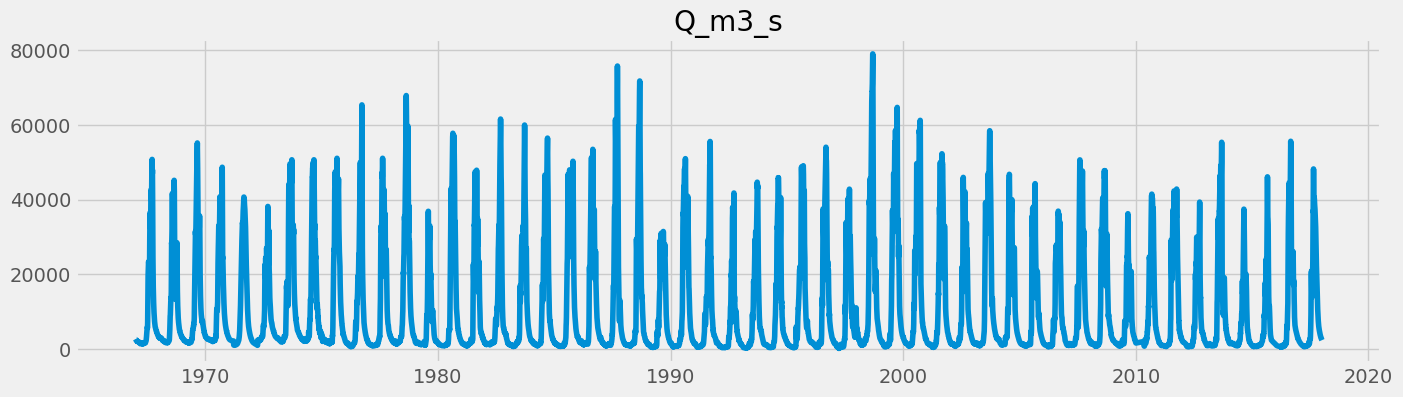

In [6]:
df.info()

plt.figure(figsize=(15,4))
plt.plot(df.index, df["Q_m3_s"])
plt.title("Q_m3_s")
plt.show()

In [7]:
test_h = 730
dftrain = df.iloc[:-test_h]
dftest = df.iloc[-test_h:]

In [8]:
dftrain = dftrain.reset_index() \
    .rename(columns={'Date':'ds',
                     'Q_m3_s':'y'})

In [9]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      17898 non-null  datetime64[ns]
 1   y       17898 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 279.8 KB


In [10]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
model.fit(dftrain)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6tcz124t/g6qa02_f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6tcz124t/oj500z49.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13323', 'data', 'file=/tmp/tmp6tcz124t/g6qa02_f.json', 'init=/tmp/tmp6tcz124t/oj500z49.json', 'output', 'file=/tmp/tmp6tcz124t/prophet_modelncdv7d3o/prophet_model-20251201135738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:57:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:57:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
dftest = dftest.reset_index() \
    .rename(columns={'Date':'ds',
                     'Q_m3_s':'y'})

In [12]:
test_forecast = model.predict(dftest)

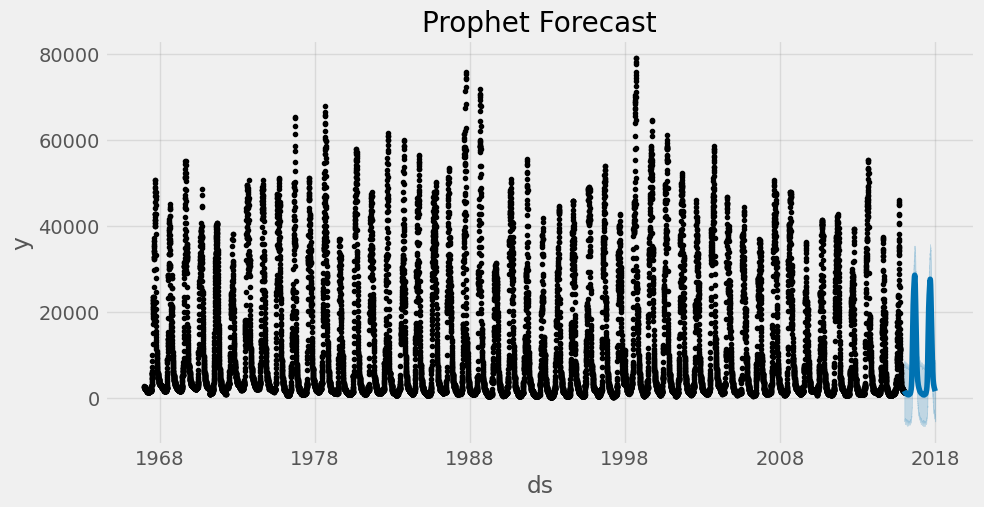

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(test_forecast, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

In [14]:
np.sqrt(mean_squared_error(y_true=dftest['y'],
                   y_pred=test_forecast['yhat']))

np.float64(6081.59867232447)

In [15]:
mean_absolute_error(y_true=dftest['y'],
                   y_pred=test_forecast['yhat'])

3049.1279600559237

In [16]:
mean_absolute_percentage_error(y_true=dftest['y'],
                   y_pred=test_forecast['yhat'])

np.float64(25.141983446220117)

In [17]:
dftest.head()

,ds,y
0,2016-01-02,1309.0
1,2016-01-03,1284.0
2,2016-01-04,1266.0
3,2016-01-05,1242.0
4,2016-01-06,1224.0


In [18]:
dftrain.head()

,ds,y
0,1967-01-01,2690.0
1,1967-01-02,2650.0
2,1967-01-03,2650.0
3,1967-01-04,2610.0
4,1967-01-05,2570.0


In [19]:
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2016-01-02,7796.020723,-4735.077609,8395.120529,7796.020723,7796.020723,-0.786470,-0.786470,-0.786470,-0.786470,-0.786470,-0.786470,0.0,0.0,0.0,1664.681054
1,2016-01-03,7795.327389,-4797.041580,8737.908321,7795.327389,7795.327389,-0.789829,-0.789829,-0.789829,-0.789829,-0.789829,-0.789829,0.0,0.0,0.0,1638.353748
2,2016-01-04,7794.634055,-5168.030761,8001.669678,7794.634055,7794.634055,-0.793027,-0.793027,-0.793027,-0.793027,-0.793027,-0.793027,0.0,0.0,0.0,1613.278576
3,2016-01-05,7793.940721,-5395.257218,7703.434884,7793.940721,7793.940721,-0.796067,-0.796067,-0.796067,-0.796067,-0.796067,-0.796067,0.0,0.0,0.0,1589.441623
4,2016-01-06,7793.247388,-4817.364582,7717.429833,7793.247388,7793.247388,-0.798953,-0.798953,-0.798953,-0.798953,-0.798953,-0.798953,0.0,0.0,0.0,1566.811089


In [26]:
df = df.reset_index() \
    .rename(columns={'Date':'ds',
                     'Q_m3_s':'y'})

In [27]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6tcz124t/0e70487p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6tcz124t/senjnwwk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71325', 'data', 'file=/tmp/tmp6tcz124t/0e70487p.json', 'init=/tmp/tmp6tcz124t/senjnwwk.json', 'output', 'file=/tmp/tmp6tcz124t/prophet_model3bwp68u_/prophet_model-20251201140017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:00:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [28]:
future = model.make_future_dataframe(periods=3650, freq='D')

In [29]:
future_forecast = model.predict(future)

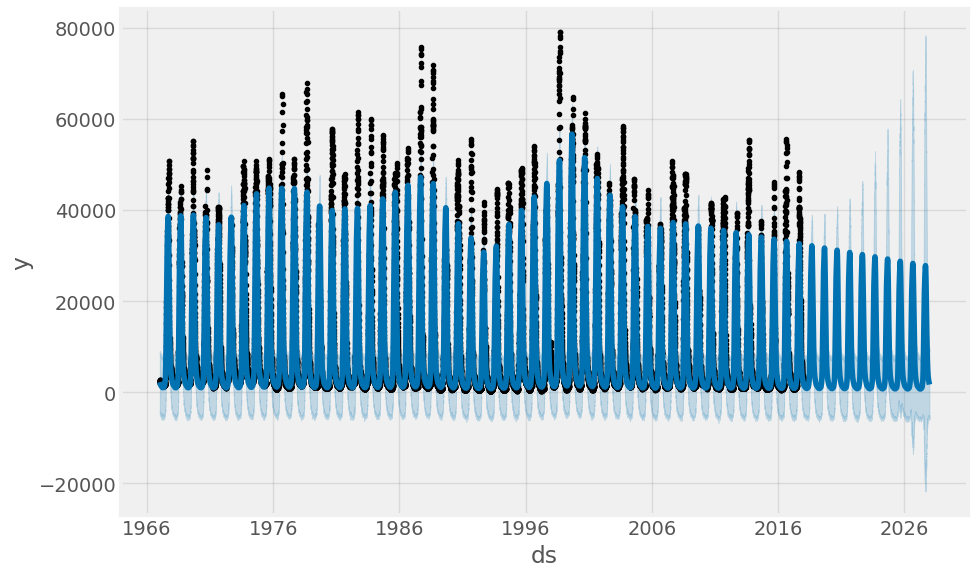

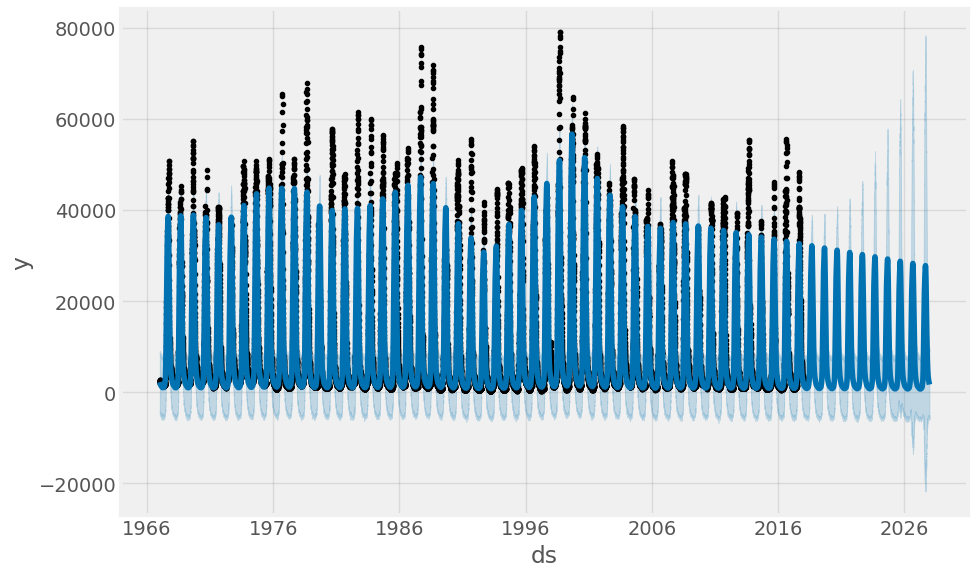

In [30]:
model.plot(future_forecast)

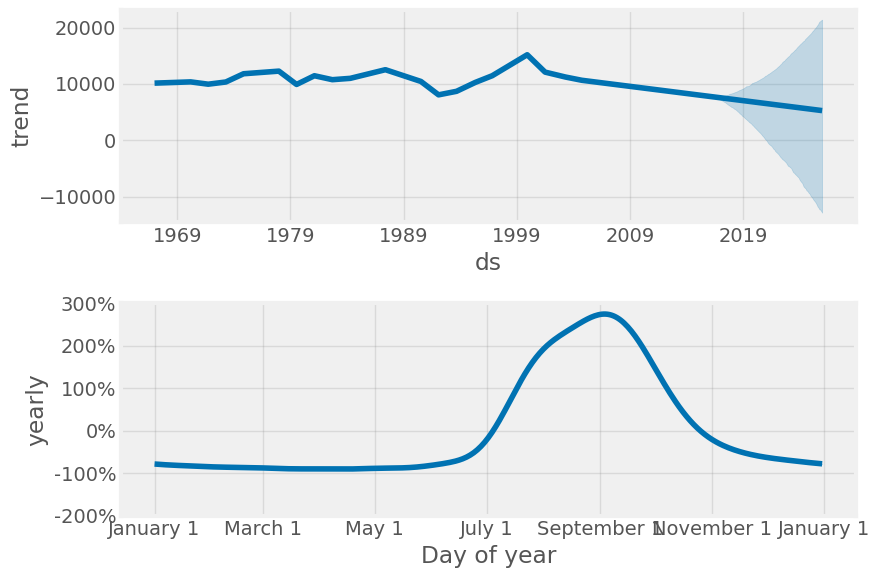

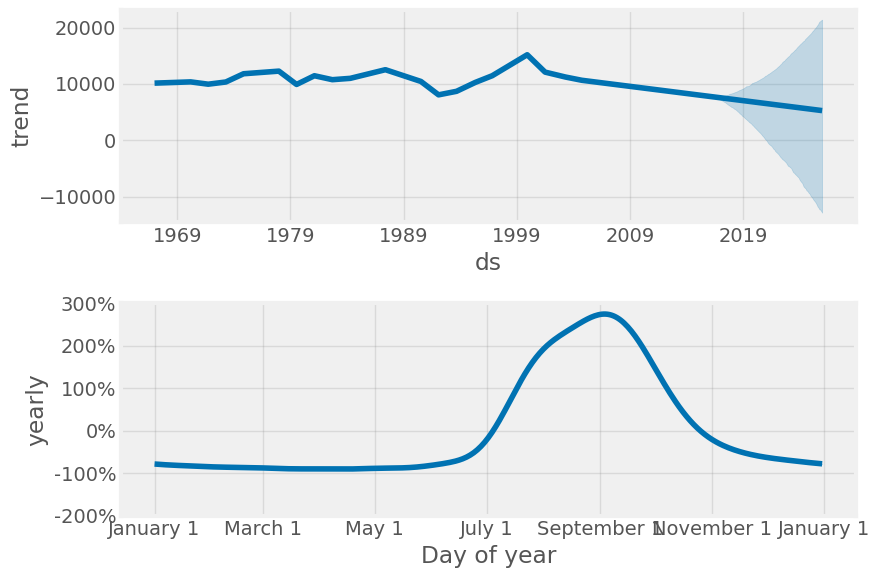

In [23]:
model.plot_components(future_forecast)

In [31]:
future = model.make_future_dataframe(periods=365, freq='D')

In [32]:
future_forecast = model.predict(future)

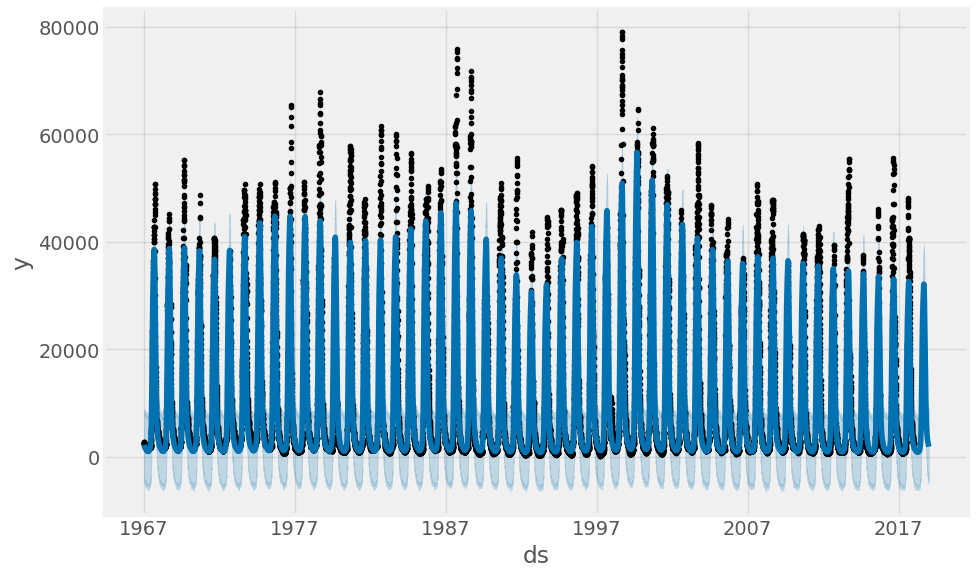

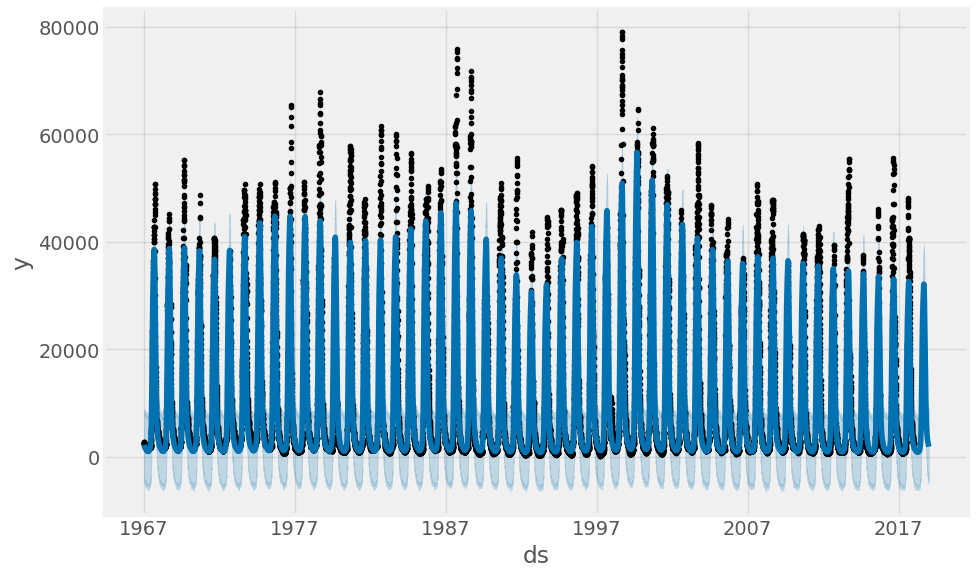

In [33]:
model.plot(future_forecast)